<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Clase1E1_10_09_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción 

Ejemplo para solidificar su comprensión del trabajo con Machine Learning 

**OBJETIVO**

El objetivo es ajustarse a los datos que proporciona, devolviendo un hiperplano de "mejor ajuste" que divide o categoriza sus datos.


##Señales: 
Información recolectada en el tiempo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from scipy import stats
from scipy import optimize

import importlib
import warnings
warnings.filterwarnings("ignore")

#scypy 
Pytho library with fundamental algorithms for scientific computing in Python

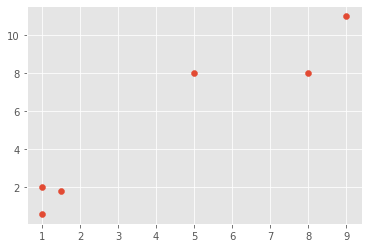

In [3]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x,y)  # Gráfico de dispersión
plt.show()

Entonces esto tiene dos características, y vemos que tenemos un gráfico 2D.
Si tuviéramos tres características, podríamos tener un gráfico 3D.
El problema ocurre cuando tenemos cuatro funciones, o cuatro mil funciones. Ahora puede comenzar a comprender el poder del aprendizaje automático, viendo y analizando una serie de dimensiones imperceptibles para nosotros.


In [4]:
x = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
x

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

Ahora que tenemos esta matriz, debemos etiquetarla con fines de entrenamiento. Hay formas de aprendizaje automático llamadas "aprendizaje no supervisado", en las que no se utiliza el etiquetado de datos, como es el caso de la agrupación en clústeres, sin embargo este ejemplo es una forma de aprendizaje supervisado.

Para nuestras etiquetas, a veces denominadas "objetivos", usaremos 0 o 1.



In [5]:
y = [0,1,0,1,0,1]

Con solo mirar nuestro conjunto de datos, podemos ver que tenemos pares de coordenadas que son números "bajos" y pares de coordenadas que son números "más altos".
Luego hemos asignado 0 a los pares de coordenadas inferiores y 1 a los pares de características superiores.

Ahora vamos a definir nuestro clasificador.

In [6]:
clf = svm.SVC(kernel='linear')         # puede ser: 'lineal', 'poli', 'rbf :  radial basis function', 'sigmoide', 'precalculado'
                                       # Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. 

In [7]:
clf.fit(x,y)

SVC(kernel='linear')

Ahora podemos predecir y probar. Imprimamos una predicción.
Esperamos que esto prediga un 0, ya que este es un par de coordenadas "*Bajas*".


In [8]:
print(clf.predict([[0.58, 0.76]]))

[0]


Y nuevamente, tenemos una respuesta teóricamente correcta de 1 como clasificación.


In [9]:
print(clf.predict([[10.58, 10.76]]))

[1]


In [16]:
print(clf.predict([[4, 4.3]]))

[0]


La pendiente de una recta  
>$ax + by + c = 0$

Está dada por la ecuación
>$m = -\frac{a}{b}$

El intercepto está definido como 
>$n = -\frac{c}{b}$

[0.1380943  0.24462418]


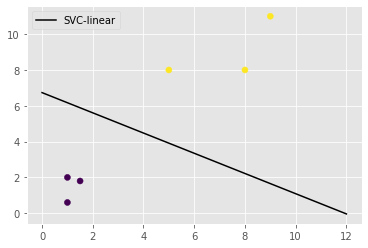

In [14]:
w = clf.coef_[0]
print(w)

# Pendiente genrada por los coeficientes
m = -w[0] / w[1]

xx = np.linspace(0,12)

# Ecuación de la recta y = m*x + n 
yy = m * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="SVC-linear")

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.legend()
plt.show()

# Modelos derivados de los datos

 **Qué es un modelo derivado de los datos?** 

**Caso ideal**: Sabemos las distribuciones de las que vienen los datos. $\Rightarrow$ podemos calcular analíticamente nuestro modelo.

- ¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



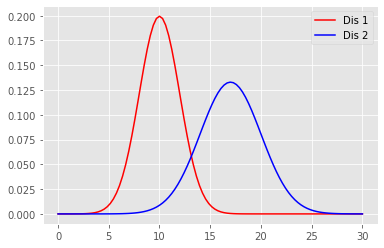

In [17]:
d1 = stats.norm(loc=10,scale=2)                        #Media y desviación estándar 
d2 = stats.norm(loc=17,scale=3)

x = np.linspace(0,30,100)

plt.plot(x, d1.pdf(x), color="red", label="Dis 1")    #Función de densidad de Probabilidad
plt.plot(x, d2.pdf(x), color="blue", label="Dis 2")

plt.legend();

frontera óptima en 13.15


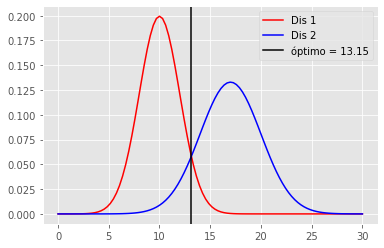

In [18]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print(f"frontera óptima en {minx:.2f}")

x = np.linspace(0,30,100)

plt.plot(x, d1.pdf(x), color="red", label="Dis 1")
plt.plot(x, d2.pdf(x), color="blue", label="Dis 2")
plt.axvline(minx, color="black", label=f"óptimo = {minx:.2f}")
plt.legend();

**Caso real:** Tenemos una muestra de los datos

→  ¿Cómo determinamos donde poner la frontera?

→  ¿Qué frontera qusiéramos obtener?

In [19]:
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    plt.figure(figsize=figsize)
    for i in range(n_datasets):
        m1 = d1.rvs(n)                                                          # variable generada a partir de números pseudoaleatorios distribuidos uniformemente
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)       
        y = np.r_[[0]*len(m1)+[1]*len(m2)]                                      # Generación de etiquetas
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

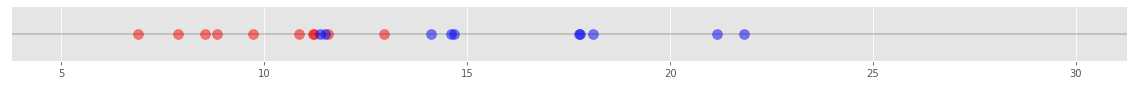

In [ ]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

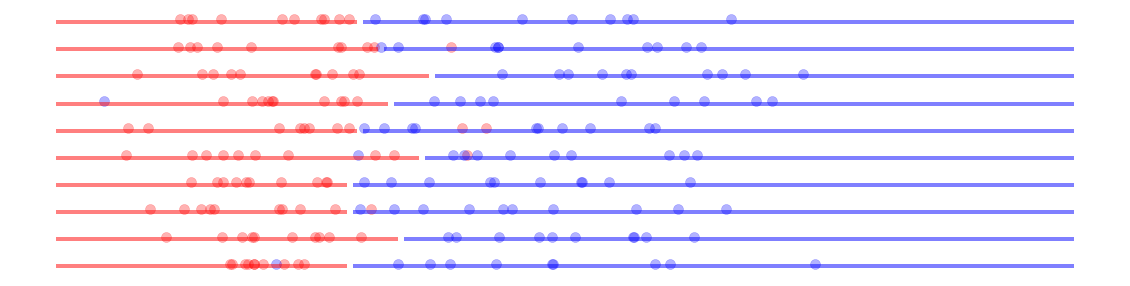

In [ ]:
show_1D_dataset_samples(10, dot_alpha=.3)

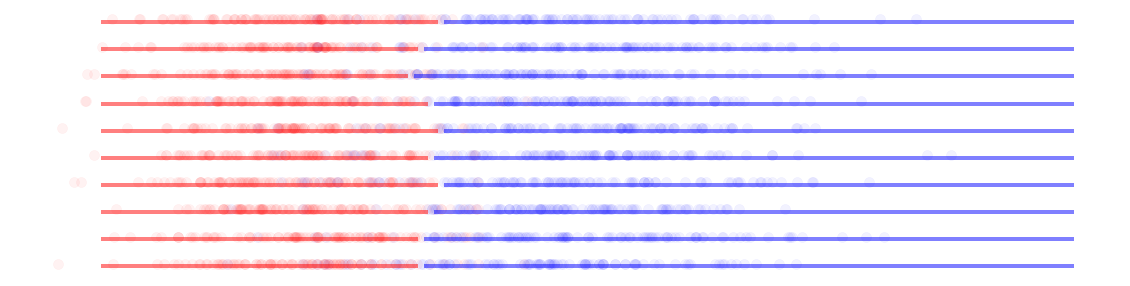

In [ ]:
show_1D_dataset_samples(100, dot_alpha=.05)

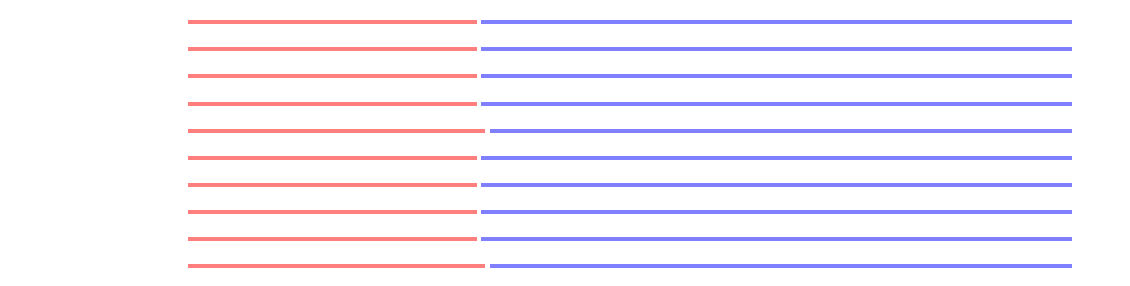

In [ ]:
show_1D_dataset_samples(10000, dot_alpha=.001)

**Caso en 2D**

- en 2D, un modelo de clasificación **es una frontera** en el plano

- **supongamos** que tenemos acceso a las distribuciones de las que surgen los datos $\rightarrow$ podemos muestrear tantas veces como queramos

- ¿cuál es la frontera que produce menos error de clasificación?

- $\epsilon$ es el error de clasificación calculado analíticamente **con la frontera óptima** porque conocemos las distribuciones que generan los datos.
- $\hat{\epsilon}$ es el error de clasificacón calculado con la muestra de datos y **con la frontera óptima** (conocida también como _frontera bayesiana_) punto en el que dos densidades son iguales.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales') 
import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


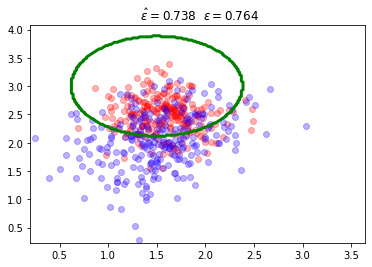

In [3]:
# Cov matriz de covarianza indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0.,0.1]],      
                                       mean1=[1.5, 2.], cov1=[[0.2,0.1], [0,.2]]) 
# Genera datos distribuidos de forma multivariada 
X,y = mc.sample(500)

mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());

**Ejercicios**

- Separa los centros de las distribuciones de cada clase (`mean0`, `mean1`).
- Aumenta y disminuye las matrices de covarianza.
- Aumenta y disminuye el número de muestras.


- Observa la estabilidad de $\hat{\epsilon}$ respecto a $\epsilon$ según ambas clases están más mezcladas o hay más o menos datos.


En general **SOLO TENEMOS UNA MUESTRA** de los datos, porque no tenemos conocimiento de las distribuciones que los generan. 
Los métodos de **estadística** y de **machine learning** están diseñados para esta situación.

Ejecuta la siguiente celda y pregúntate cada vez, **¿qué frontera establecerías con los datos que ves?**.

Fíjate que tenemos distintas muestras de una misma disitribución de base. Es decir, **la realidad detrás de estos datos siempre es la misma**.

**Aumenta** el número de muestras y hazte cada vez la misma pregunta.

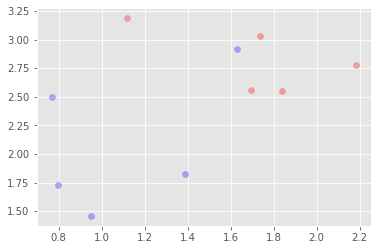

In [ ]:
X,y = mc.sample(10)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)

## Los algoritmos de machine learning:

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana.

Es decir, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear alguna suposición de base:

- Los datos vienen de distribuciones normales.
- Las columnas son estadísticamente independientes.
- La frontera es lineal, o cuadrática.
- La frontera se representa con una red neuronal.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- El objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- Distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede capturar una frontera cuadrática).
- Necesitamos dos tipos de herramientas:
   - Una buena colección de algoritmos ML.
   - Métodos para saber qué tan cerca estamos de la frontera bayesiana.

### Observa cómo un clasificador lineal aproxima la frontera con diferentes tamaños de muestras

- Cambia el parámetro `n_samples` y experimenta con el siguiente código.
- Usa luego estimadores distintos. Por.ej.

        estimator = SVC(gamma=1)
        estimator = RandomForestClassifier()
        estimator = SVC(gamma=100)
        
Hazte las siguientes preguntas:

- ¿Qué complejidad es capaz de capturar un estimador?

/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


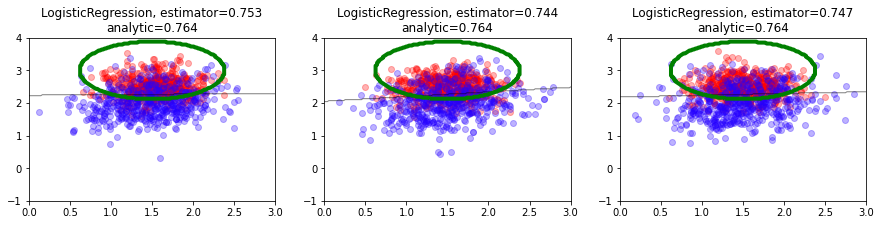

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import importlib

importlib.reload(mlutils)

n_samples = 1000
estimator = LogisticRegression()
#estimator = SVC(gamma=50)                                                       # Coeficiente si gamma='scale' (default) -> 1 / (n_features * X.var()). Si es ‘auto’, usa 1 / n_features.

plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    mlutils.plot_estimator_border(mc, estimator, mins=[0,-1], maxs=[3,4], n_samples=n_samples, legend=False)

## Solo tenemos un dataset

- Remuestrea, reentrena para medir el desempeño y entender la estabilidad
- Prueba con `train_pct` entre 0.1 y 0.9. observa la divergencia entre train y test cuando `test_pct` es más cercano a 0.9. ¿por qué?
- Prueba con `SVC(gamma=100)`. En este caso observa la divergencia entre train y test incluso cuando `test_pct` es pequeño. ¿por qué?
- Prubea además con `dataset_size` entre 20 y 500

Entiende la diferencia entre **tener pocos datos** y **overfitting**

Configuraciones interesantes sobre 

    mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                            mean1=[1.2, 2.], cov1=[[0.2,0.1],[0,.5]])

- SVC $\gamma=100$, `dataset_size=500` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=100$, `dataset_size=2000` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=.01$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- SVC $\gamma=1$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- LinearRegression, `dataset_size=100` (nunca converge a la frontera bayesiana)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


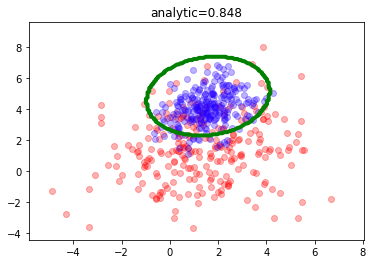

In [30]:
dataset_size = 500
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[4., 0.5], [0.1, 4.]],
                                        mean1=[1.5, 4.], cov1=[[1, 0.5],  [0.1,1.]])
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()

Realizamos un muestreo para dividir entre train y test 

In [34]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 2) (350,)
(150, 2) (150,)


Text(0.5, 1.0, 'test data')

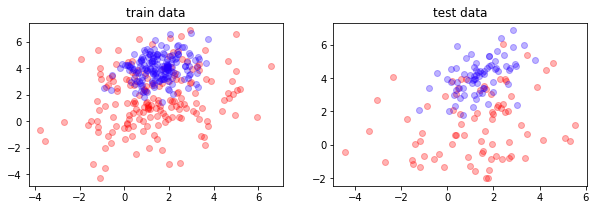

In [35]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.title("test data")

In [40]:
#estimator = SVC()
estimator = SVC(gamma=10)
#estimator = LogisticRegression()
#estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)

SVC(gamma=10)

In [41]:
print("accuracy train %.2f"%estimator.score(X_train,y_train))
tr_preds = estimator.predict(X_train)
print("predicciones para train")
print(tr_preds)
print("ground truth para train")
print(y_train)

print("\naccuracy test %.2f"%estimator.score(X_test,y_test))
ts_preds = estimator.predict(X_test)
print("predicciones para test")
print(ts_preds)
print("ground truth para test")
print(y_test)

accuracy train 0.91
predicciones para train
[1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 

train_score  0.91
test_score   0.85


(0.886725, 0.113275)

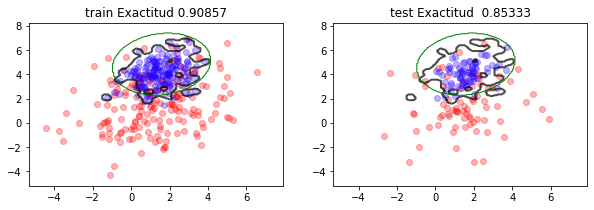

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print("train_score %5.2f"%estimator.score(X_train, y_train))
print("test_score  %5.2f"%estimator.score(X_test, y_test))
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                line_width=2, line_alpha=.7, label=None)
plt.title("train Exactitud %.5f"%estimator.score(X_train, y_train))

mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                line_width=2, line_alpha=.7, label=None)
plt.title("test Exactitud  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                line_width=1, line_alpha=1., line_color="green", label="bayes boundary")


## Multidimensionalidad (>2D)

Normalmente tenemos datasets de muchas dimensiones (columnas) y no podemos visualizar los datos como en 2D $\rightarrow$ necesitamos métodos para obtener evidencia sobre si tenemos pocos datos, estamos haciendo overfitting, etc.

Las **curvas de aprendizaje** nos ayudan a esto.

Realiza el experimento desde la sección anterior, con distintos tamaños del dataset inicial y con distintos algoritmos.

100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


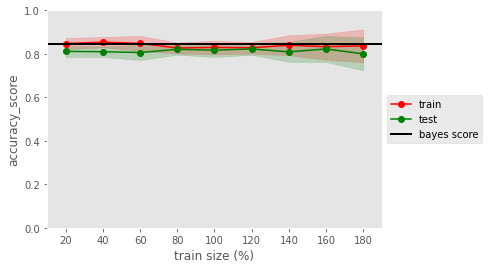

In [ ]:
estimator = LogisticRegression()

mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


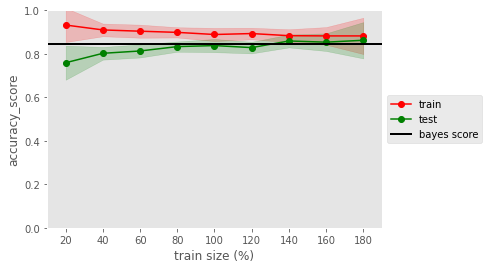

In [ ]:
estimator = SVC(gamma=1)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No olvides que normalmente **no conocemos la _frontera bayesiana_**, y por tanto no tenemos el _bayes score_

## Taxonomía de problemas de machine learning

- Supervisados
   - Clasificación
   - Regresión
- No supervisados
   - Agrupamiento
   - Estimación de densidad
   - etc.
- Reinforcement learning

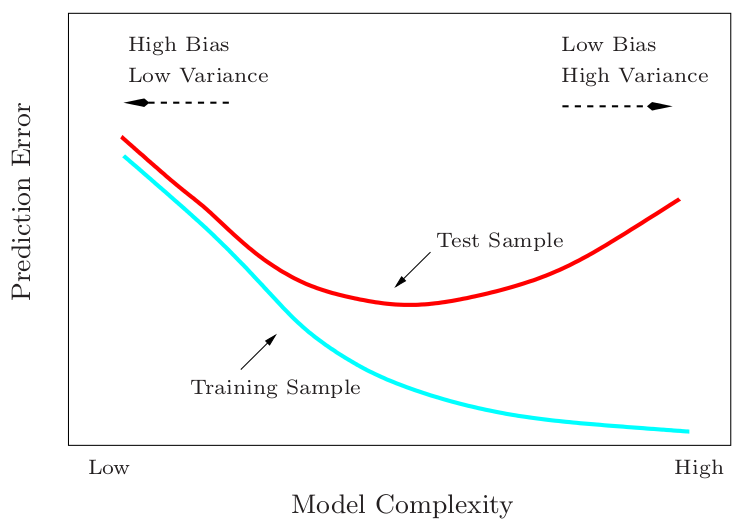

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/2022_II_signal_processing/Clase_1/bvc.png', width=600)